<ipython-input-10-074f134c4915>:3: DtypeWarning: Columns (0,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_combined = pd.read_csv('Cyclistic_Cleaned_Data.csv', dtype={'column_name': str})
<ipython-input-10-074f134c4915>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['ride_length_minutes'] = df_combined['ride_length'] / 60


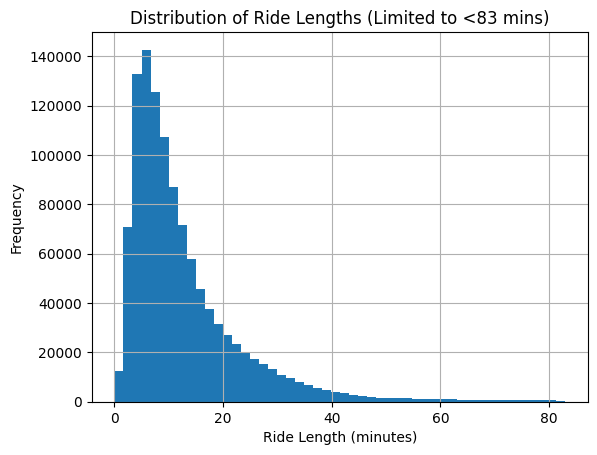

In [10]:
import pandas as pd

df_combined = pd.read_csv('Cyclistic_Cleaned_Data.csv', dtype={'column_name': str})

#Remove Negative Ride Lengths
df_combined = df_combined[df_combined['ride_length'] > 0]

#Remove Unrealistic Outliers
df_combined = df_combined[df_combined['ride_length'] < 21600]

# Summary statistics of ride_length
df_combined['ride_length'].describe()

#Convert Seconds to Minutes for Easier Interpretation
df_combined['ride_length_minutes'] = df_combined['ride_length'] / 60

#Zoom in on the Majority of Rides
import matplotlib.pyplot as plt
df_combined[df_combined['ride_length_minutes'] < 83]['ride_length_minutes'].hist(bins=50)
plt.xlabel('Ride Length (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Ride Lengths (Limited to <83 mins)')
plt.show()

#Analyze Ride Patterns
df_combined['ride_length_minutes'].describe()
df_combined.groupby('member_casual')['ride_length_minutes'].mean()
df_combined.groupby('member_casual')['ride_length_minutes'].median()
df_combined.groupby(['member_casual', 'day_of_week'])['ride_length_minutes'].mean()

#Data Export
df_combined.to_csv('Cyclistic_Cleaned_Processed.csv', index=False)
